In [392]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 6]

## Preparing the Data

### Import Main Data

In [393]:
path = r"C:\Users\Anjelito\Documents\analysis - movies\data\tmdb_5000_movies.csv"
imdb_top_5000 = pd.read_csv(path)

In [394]:
imdb_top_5000.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [395]:
imdb_top_5000.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [396]:
imdb_top_5000_short = imdb_top_5000[['title', 'release_date', 'budget' ,'revenue']]

In [397]:
imdb_top_5000_short.head(2)

,title,release_date,budget,revenue
0,Avatar,2009-12-10,237000000,2787965087
1,Pirates of the Caribbean: At World's End,2007-05-19,300000000,961000000


In [398]:
imdb_top_5000_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         4803 non-null   object
 1   release_date  4802 non-null   object
 2   budget        4803 non-null   int64 
 3   revenue       4803 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 150.2+ KB


### Import Additional Data

In [399]:
path = r"C:\Users\Anjelito\Documents\analysis - movies\data\tmdb_movies_data.csv"
additional_data = pd.read_csv(path)

In [400]:
additional_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [401]:
additional_data_short = additional_data[['original_title','cast', 'director', 
                                         'genres',  'production_companies']]

### Merging Data

In [402]:
imdb_top_5000_merged = imdb_top_5000_short.merge(right = additional_data_short, how = "inner", left_on= "title", 
                          right_on= "original_title").drop("original_title", axis = "columns")

In [403]:
imdb_top_5000_merged.head(1)

,title,release_date,budget,revenue,cast,director,genres,production_companies
0,Avatar,2009-12-10,237000000,2787965087,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...


### Cleaning Data

In [404]:
imdb_top_5000_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3904 entries, 0 to 3903
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 3904 non-null   object
 1   release_date          3904 non-null   object
 2   budget                3904 non-null   int64 
 3   revenue               3904 non-null   int64 
 4   cast                  3901 non-null   object
 5   director              3903 non-null   object
 6   genres                3904 non-null   object
 7   production_companies  3797 non-null   object
dtypes: int64(2), object(6)
memory usage: 274.5+ KB


In [405]:
imdb_top_5000_merged["main_genres"] = imdb_top_5000_merged["genres"].apply(lambda x: x.split("|")[0])

In [406]:
imdb_top_5000_merged.head(1)

,title,release_date,budget,revenue,cast,director,genres,production_companies,main_genres
0,Avatar,2009-12-10,237000000,2787965087,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,Action


In [407]:
mask = imdb_top_5000_merged["cast"].notnull()

In [408]:
imdb_top_5000_merged["cast_1"] = imdb_top_5000_merged[mask]["cast"].apply(lambda x: x.split("|")[0])

In [409]:
def get_cast_2(casts):
    try:
        return casts.split("|")[1]
    except IndexError:
        pass
    else:
        return null
    
def get_cast_3(casts):
    try:
        return casts.split("|")[2]
    except IndexError:
        pass
    else:
        return null
    
def get_director(director):
    try:
        return director.split("|")[0]
    except IndexError:
        pass
    else:
        return null

In [410]:
imdb_top_5000_merged["cast_2"] = imdb_top_5000_merged[mask]["cast"].apply(lambda x: get_cast_2(x))

In [411]:
imdb_top_5000_merged["cast_3"] = imdb_top_5000_merged[mask]["cast"].apply(lambda x: get_cast_3(x))

In [412]:
mask = imdb_top_5000_merged["director"].notnull()
imdb_top_5000_merged["main_director"] = imdb_top_5000_merged[mask]["director"].apply(lambda x: get_director(x))

In [413]:
imdb_top_5000_merged.head(1)

,title,release_date,budget,revenue,cast,director,genres,production_companies,main_genres,cast_1,cast_2,cast_3,main_director
0,Avatar,2009-12-10,237000000,2787965087,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,Action,Sam Worthington,Zoe Saldana,Sigourney Weaver,James Cameron


In [414]:
imdb_top_5000_merged.columns

Index(['title', 'release_date', 'budget', 'revenue', 'cast', 'director',
       'genres', 'production_companies', 'main_genres', 'cast_1', 'cast_2',
       'cast_3', 'main_director'],
      dtype='object')

In [415]:
imdb_top_5000_merged = imdb_top_5000_merged[['title', 'release_date','main_genres','main_director',
                                             'cast_1', 'cast_2', 'cast_3','budget', 'revenue']]

In [416]:
imdb_top_5000_merged = imdb_top_5000_merged.fillna("No Data")

In [417]:
imdb_top_5000_merged.replace("None", "No Data", inplace = True)

In [418]:
imdb_top_5000_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3904 entries, 0 to 3903
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          3904 non-null   object
 1   release_date   3904 non-null   object
 2   main_genres    3904 non-null   object
 3   main_director  3904 non-null   object
 4   cast_1         3904 non-null   object
 5   cast_2         3904 non-null   object
 6   cast_3         3904 non-null   object
 7   budget         3904 non-null   int64 
 8   revenue        3904 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 305.0+ KB


In [419]:
imdb_top_5000_merged["release_date"] = pd.to_datetime(imdb_top_5000_merged["release_date"])

In [420]:
imdb_top_5000_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3904 entries, 0 to 3903
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          3904 non-null   object        
 1   release_date   3904 non-null   datetime64[ns]
 2   main_genres    3904 non-null   object        
 3   main_director  3904 non-null   object        
 4   cast_1         3904 non-null   object        
 5   cast_2         3904 non-null   object        
 6   cast_3         3904 non-null   object        
 7   budget         3904 non-null   int64         
 8   revenue        3904 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 305.0+ KB


In [421]:
imdb_top_5000_clean = imdb_top_5000_merged[(imdb_top_5000_merged.iloc[:, 1:] != 0).all(axis=1)]

In [422]:
imdb_top_5000_clean = imdb_top_5000_clean.sort_values(by = ["title", "release_date"],
                                                      ascending= True, ignore_index= True)

In [441]:
imdb_top_5000_clean.head(2)

,title,release_date,main_genres,main_director,cast_1,cast_2,cast_3,budget,revenue
0,(500) Days of Summer,2009-07-17,Comedy,Marc Webb,Joseph Gordon-Levitt,Zooey Deschanel,ChloÃ« Grace Moretz,7500000,60722734
1,10 Things I Hate About You,1999-03-30,Comedy,Gil Junger,Julia Stiles,Heath Ledger,Joseph Gordon-Levitt,16000000,53478166


In [424]:
imdb_top_5000_clean.drop_duplicates(subset = "title", inplace = True, ignore_index= True)

In [442]:
imdb_top_5000_clean.head(2)

,title,release_date,main_genres,main_director,cast_1,cast_2,cast_3,budget,revenue
0,(500) Days of Summer,2009-07-17,Comedy,Marc Webb,Joseph Gordon-Levitt,Zooey Deschanel,ChloÃ« Grace Moretz,7500000,60722734
1,10 Things I Hate About You,1999-03-30,Comedy,Gil Junger,Julia Stiles,Heath Ledger,Joseph Gordon-Levitt,16000000,53478166


## Analyze Correlation Betweeen Budget and Revenue

In [427]:
imdb_top_5000_clean.corr()

,budget,revenue
budget,1.000000,0.697011
revenue,0.697011,1.000000


Text(0, 0.5, 'Revenue')

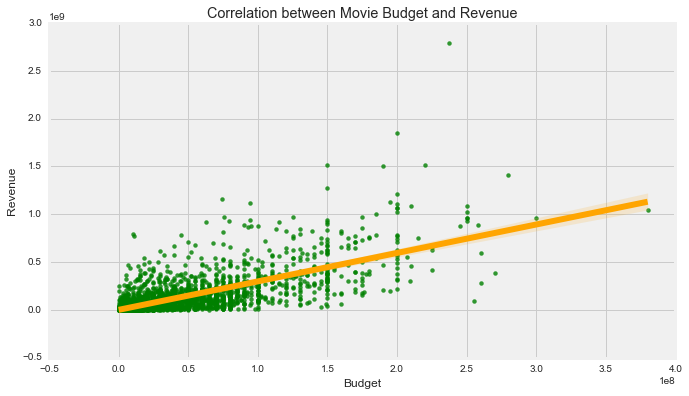

In [426]:
sns.regplot(x="budget", y="revenue", data = imdb_top_5000_clean, scatter_kws= {"color": "green"},
           line_kws= {"color": "orange"})
plt.title("Correlation between Movie Budget and Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")

#### We see from analysis above that budget is a relatively good predictor of a movie's revenue, with a Person's r of __0.697011__

## Who are The Highest Grossing Directors?

In [428]:
imdb_top_5000_clean[["main_director", "revenue"]]

,main_director,revenue
0,Marc Webb,60722734
1,Gil Junger,53478166
2,Kevin Lima,183611771
3,Robert Moresco,143451
4,William Friedkin,1000000
...,...,...
2847,Ben Stiller,60780981
2848,Peter Hewitt,12506188
2849,David Cronenberg,2856712
2850,Rob Cohen,277448382


In [429]:
imdb_director = imdb_top_5000_clean[["main_director", "revenue"]].groupby("main_director")

In [430]:
highest_total_earner_director = imdb_director.sum().sort_values("revenue", ascending= False).head(10).copy()
highest_total_earner_director

,revenue
main_director,
Steven Spielberg,8934596656
Peter Jackson,6498642820
James Cameron,5883569439
Michael Bay,5621706244
Christopher Nolan,4227483234
Robert Zemeckis,3394886126
Chris Columbus,3366639822
George Lucas,3339113893
Tim Burton,3337418241


In [431]:
highest_average_earner_director = imdb_director.mean().sort_values("revenue", ascending= False).head(10).copy()
highest_average_earner_director

,revenue
main_director,
Adam Green,1.274219e+09
Kyle Balda,1.156731e+09
Joss Whedon,9.879437e+08
David Yates,9.360860e+08
Pete Docter,8.576112e+08
James Cameron,8.405099e+08
Lee Unkrich,8.148930e+08
Colin Trevorrow,7.587683e+08
Robert Stromberg,7.585398e+08


In [432]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


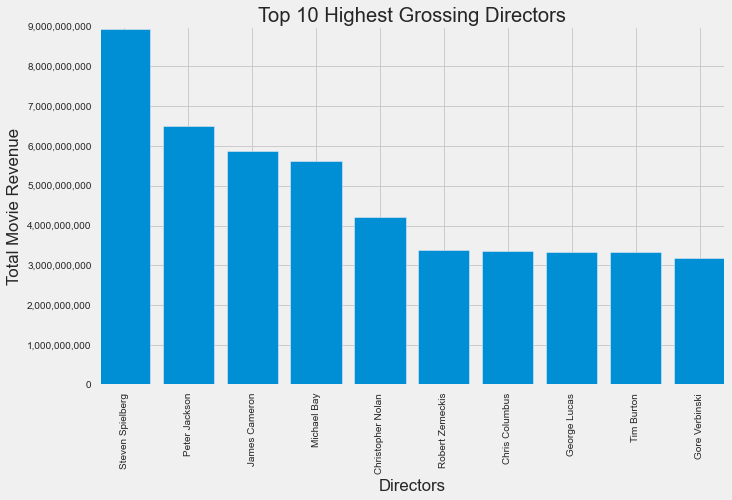

In [433]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
y_axis = highest_total_earner_director["revenue"]
x_axis = list(highest_total_earner_director.index.values)
ax.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.ticklabel_format(axis="y", style='plain')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Top 10 Highest Grossing Directors")
plt.xlabel("Directors")
plt.ylabel("Total Movie Revenue")
plt.show()

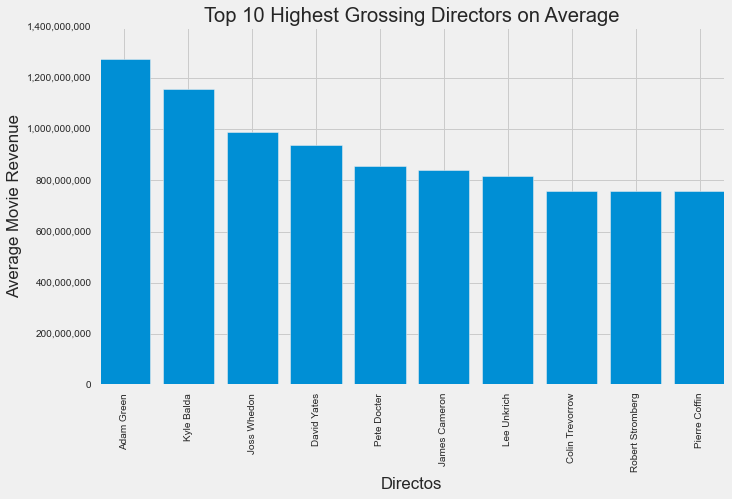

In [434]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
y_axis = highest_average_earner_director["revenue"]
x_axis = list(highest_average_earner_director.index.values)
ax.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.ticklabel_format(axis="y", style='plain')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Top 10 Highest Grossing Directors on Average")
plt.xlabel("Directos")
plt.ylabel("Average Movie Revenue")
plt.show()

#### No surprise in highest grossing overall, but many surpises on highest grossing on average

## Who are The Highest Grossing Actors/Actresses?

In [435]:
actors = imdb_top_5000_clean[["cast_1", "cast_2", "cast_3", "revenue"]]

In [436]:
actors_earnings = pd.melt(actors, id_vars= "revenue", value_vars= ["cast_1", "cast_2", "cast_3"]).sort_values(["revenue",
    "variable"], ascending = [False, True])
actors_earnings = actors_earnings.groupby('value')

In [437]:
highest_total_earner_actor = actors_earnings.sum().sort_values("revenue", ascending= False).head(10)
highest_total_earner_actor

,revenue
value,
Tom Cruise,8111534993
Ian McKellen,7854210133
Tom Hanks,7852031825
Johnny Depp,7574994998
Robert Downey Jr.,6883103410
Cameron Diaz,6553083103
Will Smith,6521416886
Leonardo DiCaprio,6369810542
Harrison Ford,6327584691


In [438]:
highest_average_earner_actor = actors_earnings.mean().sort_values("revenue", ascending= False).head(10)
highest_average_earner_actor

,revenue
value,
Frances Fisher,1.845034e+09
Shawn Ashmore,1.274219e+09
Alexander Gould,9.403355e+08
Ellen DeGeneres,9.403355e+08
LÃ©a Seydoux,8.806746e+08
Chris Wedge,8.772448e+08
Phyllis Smith,8.576112e+08
Robert MacNaughton,7.929106e+08
Jonathan Taylor Thomas,7.882418e+08


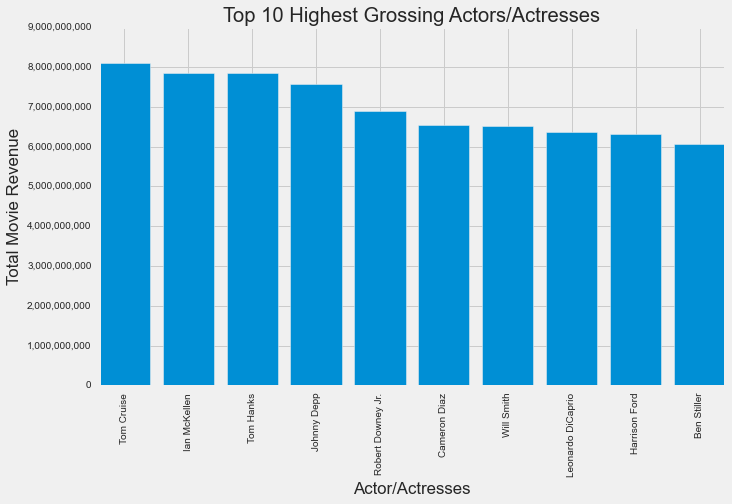

In [439]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
y_axis = highest_total_earner_actor["revenue"]
x_axis = list(highest_total_earner_actor.index.values)
ax.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.ticklabel_format(axis="y", style='plain')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Top 10 Highest Grossing Actors/Actresses")
plt.xlabel("Actor/Actresses")
plt.ylabel("Total Movie Revenue")
plt.show()

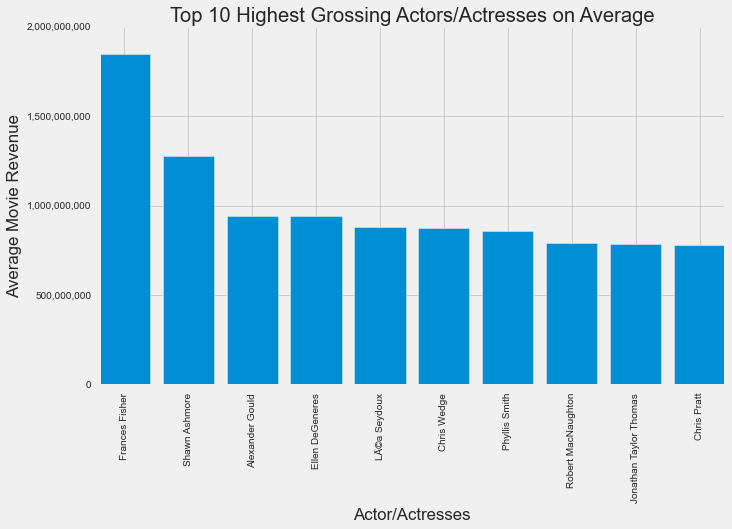

In [440]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
y_axis = highest_average_earner_actor["revenue"]
x_axis = list(highest_average_earner_actor.index.values)
ax.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.ticklabel_format(axis="y", style='plain')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Top 10 Highest Grossing Actors/Actresses on Average")
plt.xlabel("Actor/Actresses")
plt.ylabel("Average Movie Revenue")
plt.show()

#### Again, familiar superstars in highest grossing overall but many surprising names in highest grossing on average.